## Resumen del capítulo

Este capítulo está diseñado para facilitar la transición de pandas a Polars, resaltando tanto las similitudes como las diferencias entre ambos paquetes. Aprenderás:

- Qué tienen en común pandas y Polars.
- Cómo difieren la sintaxis y los resultados de las operaciones.
- Qué conceptos de pandas debes desaprender.
- Cómo realizar operaciones comunes en ambos entornos.

El enfoque será en la experiencia del usuario, sin comparar el rendimiento. Este capítulo está dirigido a quienes ya tienen experiencia con pandas y desean adaptarse a Polars de manera efectiva.

### Nota sobre comandos mágicos y shell en Windows

En Jupyter, el prefijo `!` ejecuta comandos del sistema usando la shell por defecto. En Windows suele ser `cmd.exe`, no PowerShell, por lo que comandos como `cat` o `ls` no existen ahí.

Opciones:
- Usa equivalentes de Windows: `!type ruta\al\archivo` y `!dir`.
- O ejecuta PowerShell: `!powershell -NoProfile -Command Get-Content ruta\al\archivo`.
- Mejor aún, usa Python/Polars directamente para que funcione igual en cualquier SO.

In [1]:
!type data\animals.csv

animal,class,habitat,diet,lifespan,status,features,weight
dolphin,mammal,oceans/rivers,carnivore,40,least concern,high intelligence,150
duck,bird,wetlands,omnivore,8,least concern,waterproof feathers,3
elephant,mammal,savannah,herbivore,60,endangered,large ears and trunk,8000
ibis,bird,wetlands,omnivore,16,least concern,"long, curved bill",1
impala,mammal,savannah,herbivore,12,least concern,"long, curved horns",70
kudu,mammal,savannah,herbivore,15,least concern,spiral horns,250
narwhal,mammal,arctic ocean,carnivore,40,near threatened,"long, spiral tusk",
panda,mammal,forests,herbivore,20,vulnerable,black and white coloration,100
polar bear,mammal,arctic,carnivore,25,vulnerable,thick fur and blubber,720
ray,fish,oceans,carnivore,20,"","flat, disc-shaped body",90


In [2]:
import polars as pl
import pandas as pd

animals_pd = pd.read_csv("data/animals.csv", sep=",", header=0)
animals_pl = pl.read_csv("data/animals.csv", separator=",", has_header=True)

print(f"{type(animals_pd) = }")
print(f"{type(animals_pl) = }")

type(animals_pd) = <class 'pandas.core.frame.DataFrame'>
type(animals_pl) = <class 'polars.dataframe.frame.DataFrame'>


In [3]:
animals_pd

,animal,class,habitat,diet,lifespan,status,features,weight
0,dolphin,mammal,oceans/rivers,carnivore,40,least concern,high intelligence,150.0
1,duck,bird,wetlands,omnivore,8,least concern,waterproof feathers,3.0
2,elephant,mammal,savannah,herbivore,60,endangered,large ears and trunk,8000.0
3,ibis,bird,wetlands,omnivore,16,least concern,"long, curved bill",1.0
4,impala,mammal,savannah,herbivore,12,least concern,"long, curved horns",70.0
5,kudu,mammal,savannah,herbivore,15,least concern,spiral horns,250.0
6,narwhal,mammal,arctic ocean,carnivore,40,near threatened,"long, spiral tusk",NaN
7,panda,mammal,forests,herbivore,20,vulnerable,black and white coloration,100.0
8,polar bear,mammal,arctic,carnivore,25,vulnerable,thick fur and blubber,720.0
9,ray,fish,oceans,carnivore,20,NaN,"flat, disc-shaped body",90.0


In [4]:
animals_pl

animal,class,habitat,diet,lifespan,status,features,weight
str,str,str,str,i64,str,str,i64
"""dolphin""","""mammal""","""oceans/rivers""","""carnivore""",40,"""least concern""","""high intelligence""",150
"""duck""","""bird""","""wetlands""","""omnivore""",8,"""least concern""","""waterproof feathers""",3
"""elephant""","""mammal""","""savannah""","""herbivore""",60,"""endangered""","""large ears and trunk""",8000
"""ibis""","""bird""","""wetlands""","""omnivore""",16,"""least concern""","""long, curved bill""",1
"""impala""","""mammal""","""savannah""","""herbivore""",12,"""least concern""","""long, curved horns""",70
"""kudu""","""mammal""","""savannah""","""herbivore""",15,"""least concern""","""spiral horns""",250
"""narwhal""","""mammal""","""arctic ocean""","""carnivore""",40,"""near threatened""","""long, spiral tusk""",null
"""panda""","""mammal""","""forests""","""herbivore""",20,"""vulnerable""","""black and white coloration""",100
"""polar bear""","""mammal""","""arctic""","""carnivore""",25,"""vulnerable""","""thick fur and blubber""",720


In [5]:
animals_pd["animal"]

0       dolphin
1          duck
2      elephant
3          ibis
4        impala
5          kudu
6       narwhal
7         panda
8    polar bear
9           ray
Name: animal, dtype: object

In [6]:
animals_pl.get_column("animal")

animal
str
"""dolphin"""
"""duck"""
"""elephant"""
"""ibis"""
"""impala"""
"""kudu"""
"""narwhal"""
"""panda"""
"""polar bear"""


In [7]:
animals_pd = animals_pd.drop(columns=["habitat", "diet", "features"])
animals_pd

,animal,class,lifespan,status,weight
0,dolphin,mammal,40,least concern,150.0
1,duck,bird,8,least concern,3.0
2,elephant,mammal,60,endangered,8000.0
3,ibis,bird,16,least concern,1.0
4,impala,mammal,12,least concern,70.0
5,kudu,mammal,15,least concern,250.0
6,narwhal,mammal,40,near threatened,NaN
7,panda,mammal,20,vulnerable,100.0
8,polar bear,mammal,25,vulnerable,720.0
9,ray,fish,20,NaN,90.0


In [8]:
animals_pl = animals_pl.drop("habitat", "diet", "features")
animals_pl

animal,class,lifespan,status,weight
str,str,i64,str,i64
"""dolphin""","""mammal""",40,"""least concern""",150
"""duck""","""bird""",8,"""least concern""",3
"""elephant""","""mammal""",60,"""endangered""",8000
"""ibis""","""bird""",16,"""least concern""",1
"""impala""","""mammal""",12,"""least concern""",70
"""kudu""","""mammal""",15,"""least concern""",250
"""narwhal""","""mammal""",40,"""near threatened""",null
"""panda""","""mammal""",20,"""vulnerable""",100
"""polar bear""","""mammal""",25,"""vulnerable""",720


## Conceptos para desaprender

Al migrar de pandas a Polars, es fundamental desaprender ciertos conceptos arraigados en pandas para aprovechar al máximo la nueva librería. Los próximos apartados abordarán cinco ideas clave que debes dejar atrás:

- **El índice:** Polars no utiliza índices como pandas, lo que simplifica muchas operaciones.
- **Ejes:** El concepto de ejes (axis=0, axis=1) desaparece en Polars; las operaciones se definen de otra manera.
- **Indexación y slicing:** La forma de seleccionar datos cambia, y Polars ofrece métodos más explícitos y seguros.
- **Eager vs Lazy:** Polars introduce el procesamiento perezoso (lazy), permitiendo optimizaciones automáticas en las consultas.
- **Relajación:** Polars es más estricto en la manipulación de datos, lo que ayuda a evitar errores silenciosos.

Desaprender estos conceptos te permitirá adoptar una mentalidad más eficiente y aprovechar las ventajas de Polars desde el principio.

## Index

In [9]:
animals_pd.index

RangeIndex(start=0, stop=10, step=1)

In [10]:
animals_agg_pd = animals_pd.groupby(["class", "status"])[["weight"]].mean()
animals_agg_pd

weight
class  status                      
bird   least concern       2.000000
mammal endangered       8000.000000
       least concern     156.666667
       near threatened          NaN
       vulnerable        410.000000

In [11]:
animals_agg_pd.index

MultiIndex([(  'bird',   'least concern'),
            ('mammal',      'endangered'),
            ('mammal',   'least concern'),
            ('mammal', 'near threatened'),
            ('mammal',      'vulnerable')],
           names=['class', 'status'])

In [12]:
animals_agg_pd.reset_index()

,class,status,weight
0,bird,least concern,2.000000
1,mammal,endangered,8000.000000
2,mammal,least concern,156.666667
3,mammal,near threatened,NaN
4,mammal,vulnerable,410.000000


In [13]:
_ = animals_pl.group_by(["class", "status"]).agg(pl.col("weight").mean())
_

class,status,weight
str,str,f64
"""mammal""","""endangered""",8000.0
"""mammal""","""least concern""",156.666667
"""fish""","""""",90.0
"""bird""","""least concern""",2.0
"""mammal""","""vulnerable""",410.0
"""mammal""","""near threatened""",null


Al no manejar índices, Polars no tiene equivalentes para los métodos de pandas relacionados con índices: `df.align()`, `df.droplevel()`, `df.reindex()`, `df.rename_axis()`, `df.reset_index()`, `df.set_axis()`, `df.set_index()`, `df.sort_index()`, `df.stack()`, `df.swapaxis()`/`df.swapaxes()`, `df.swaplevel()`, `df.unstack()`. En Polars se trabaja de forma explícita sobre columnas, joins y agregaciones en lugar de operaciones sobre el índice.

## Axes

In [14]:
animals_pd.drop("weight")

KeyError: "['weight'] not found in axis"

In [16]:
animals_pd.drop("weight", axis=1)

,animal,class,lifespan,status
0,dolphin,mammal,40,least concern
1,duck,bird,8,least concern
2,elephant,mammal,60,endangered
3,ibis,bird,16,least concern
4,impala,mammal,12,least concern
5,kudu,mammal,15,least concern
6,narwhal,mammal,40,near threatened
7,panda,mammal,20,vulnerable
8,polar bear,mammal,25,vulnerable
9,ray,fish,20,NaN


### Operaciones en Polars: columnas vs filas

En Polars no se indica un "axis" porque los métodos son explícitos sobre columnas o sobre filas, lo que hace el código más claro y reduce errores.

- Operaciones sobre columnas (estructura/transformación de columnas): `df.drop("col")`, `df.rename({"a":"b"})`, `df.with_columns([pl.col("a") * 2])`, `df.select(...)`.
- Operaciones sobre filas (filtrado/ordenación/limpieza): `df.filter(pl.col("weight") > 100)`, `df.sort("weight")`, `df.drop_nulls()`.

Consecuencia práctica: piensa si quieres transformar la estructura/tablas (columnas) o filtrar/ordenar registros (filas) y elige el método correspondiente; no hay que pasar `axis=` ni adivinar el comportamiento.

##  Indexing and Slicing

In [17]:
animals_pd[["animal", "class"]]

,animal,class
0,dolphin,mammal
1,duck,bird
2,elephant,mammal
3,ibis,bird
4,impala,mammal
5,kudu,mammal
6,narwhal,mammal
7,panda,mammal
8,polar bear,mammal
9,ray,fish


In [18]:
animals_pd[animals_pd["status"] == "endangered"]

,animal,class,lifespan,status,weight
2,elephant,mammal,60,endangered,8000.0


In [19]:
animals_pd[:3]

,animal,class,lifespan,status,weight
0,dolphin,mammal,40,least concern,150.0
1,duck,bird,8,least concern,3.0
2,elephant,mammal,60,endangered,8000.0


In [20]:
animals_pd["weight"] = animals_pd["weight"] * 1000
animals_pd

,animal,class,lifespan,status,weight
0,dolphin,mammal,40,least concern,150000.0
1,duck,bird,8,least concern,3000.0
2,elephant,mammal,60,endangered,8000000.0
3,ibis,bird,16,least concern,1000.0
4,impala,mammal,12,least concern,70000.0
5,kudu,mammal,15,least concern,250000.0
6,narwhal,mammal,40,near threatened,NaN
7,panda,mammal,20,vulnerable,100000.0
8,polar bear,mammal,25,vulnerable,720000.0
9,ray,fish,20,NaN,90000.0


In [21]:
animals_pd["weight"] = animals_pd["weight"].sort_values()

In [22]:
animals_pd["weight"]

0     150000.0
1       3000.0
2    8000000.0
3       1000.0
4      70000.0
5     250000.0
6          NaN
7     100000.0
8     720000.0
9      90000.0
Name: weight, dtype: float64

##  Eagerness

In [23]:
lazy_query = (
    pl.scan_csv("data/animals.csv")
    .group_by("class")
    .agg(pl.col("weight").mean())
    .filter(pl.col("class") == "mammal")
)

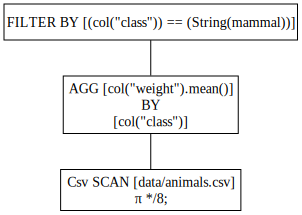

In [24]:
lazy_query.show_graph(optimized=False)

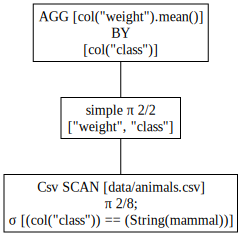

In [25]:
lazy_query.show_graph()

In [26]:
lazy_query.collect()

class,weight
str,f64
"""mammal""",1548.333333


##  Relaxedness

## Strictness vs. “relajación” (resumen)

Polars es más estricto que pandas en muchas decisiones de diseño. Esa estrictez evita ambigüedades y errores silenciosos y permite optimizaciones. Puntos clave explicados en español:

- Tipos de fecha y hora: en Polars se debe usar objetos datetime de Python o los tipos propios de Polars (Date/Datetime). No confiar en cadenas de texto para representar fechas.
- Nombres de columnas: solo se permiten nombres tipo String y deben ser únicos. Evitar tener columnas con el mismo nombre.
- Valores faltantes vs NaN: Polars diferencia explícitamente entre null (valor faltante) y NaN (número inválido). Esa distinción es consistente entre tipos.
- Tipos con valores faltantes: Polars soporta valores faltantes en todos los tipos; no convierte enteros a float automáticamente como hace pandas cuando aparecen NAs.
- Comportamiento en agregaciones: Polars preserva todos los grupos en una agregación (no elimina silenciosamente grupos cuando faltan valores), lo que da resultados previsibles.
- Sin fallback a object: Polars no cae a tipos genéricos de Python (object); los tipos son concretos y estables, lo que mejora la seguridad de las operaciones.
- Comparaciones de booleanos: solo se deben comparar Series booleanas con booleanos (o con otras Series booleanas). Evitar comparaciones implícitas con enteros.
- Forma de los resultados: muchas operaciones que en pandas devuelven Series o un comportamiento variable devuelven en Polars estructuras consistentes (por ejemplo, operaciones de agregación devuelven un DataFrame con una fila).
- Selecciones y retornos: al seleccionar una única fila/valor, Polars tiende a devolver DataFrames/estructuras coherentes en lugar de cambiar el tipo devuelto según el contexto.
- Beneficio general: esta estrictitud da retroalimentación temprana (errores en tiempo de diseño), resultados más predecibles y mejores oportunidades de optimización.

Consejos prácticos: especificar tipos desde el inicio, tratar null y NaN explícitamente, garantizar nombres de columnas únicos y escribir comparaciones de manera explícita. La estrictez de Polars es una ventaja para escribir consultas robustas y confiables.

##  Common Operations Side By Side

In [27]:
# Removiendo duplicados
animals_pd.drop_duplicates(subset="class")

,animal,class,lifespan,status,weight
0,dolphin,mammal,40,least concern,150000.0
1,duck,bird,8,least concern,3000.0
9,ray,fish,20,NaN,90000.0


In [28]:
animals_pl.unique("class")

animal,class,lifespan,status,weight
str,str,i64,str,i64
"""dolphin""","""mammal""",40,"""least concern""",150
"""duck""","""bird""",8,"""least concern""",3
"""ray""","""fish""",20,"""""",90


In [29]:
animals_pl.drop_nulls(subset="weight")

animal,class,lifespan,status,weight
str,str,i64,str,i64
"""dolphin""","""mammal""",40,"""least concern""",150
"""duck""","""bird""",8,"""least concern""",3
"""elephant""","""mammal""",60,"""endangered""",8000
"""ibis""","""bird""",16,"""least concern""",1
"""impala""","""mammal""",12,"""least concern""",70
"""kudu""","""mammal""",15,"""least concern""",250
"""panda""","""mammal""",20,"""vulnerable""",100
"""polar bear""","""mammal""",25,"""vulnerable""",720
"""ray""","""fish""",20,"""""",90


In [30]:
animals_pd["weight"] = animals_pd["weight"] / 1000
animals_pd.dropna(subset=["weight"])

,animal,class,lifespan,status,weight
0,dolphin,mammal,40,least concern,150.0
1,duck,bird,8,least concern,3.0
2,elephant,mammal,60,endangered,8000.0
3,ibis,bird,16,least concern,1.0
4,impala,mammal,12,least concern,70.0
5,kudu,mammal,15,least concern,250.0
7,panda,mammal,20,vulnerable,100.0
8,polar bear,mammal,25,vulnerable,720.0
9,ray,fish,20,NaN,90.0


### Sort rows

In [31]:
animals_pd.sort_values(by="weight", ascending=False)

,animal,class,lifespan,status,weight
2,elephant,mammal,60,endangered,8000.0
8,polar bear,mammal,25,vulnerable,720.0
5,kudu,mammal,15,least concern,250.0
0,dolphin,mammal,40,least concern,150.0
7,panda,mammal,20,vulnerable,100.0
9,ray,fish,20,NaN,90.0
4,impala,mammal,12,least concern,70.0
1,duck,bird,8,least concern,3.0
3,ibis,bird,16,least concern,1.0
6,narwhal,mammal,40,near threatened,NaN


In [32]:
animals_pl.sort("weight", descending=True)

animal,class,lifespan,status,weight
str,str,i64,str,i64
"""narwhal""","""mammal""",40,"""near threatened""",null
"""elephant""","""mammal""",60,"""endangered""",8000
"""polar bear""","""mammal""",25,"""vulnerable""",720
"""kudu""","""mammal""",15,"""least concern""",250
"""dolphin""","""mammal""",40,"""least concern""",150
"""panda""","""mammal""",20,"""vulnerable""",100
"""ray""","""fish""",20,"""""",90
"""impala""","""mammal""",12,"""least concern""",70
"""duck""","""bird""",8,"""least concern""",3


### Assingn a new data type

In [33]:
animals_pd.assign(lifespan=animals_pd["lifespan"].astype("float64"))

,animal,class,lifespan,status,weight
0,dolphin,mammal,40.0,least concern,150.0
1,duck,bird,8.0,least concern,3.0
2,elephant,mammal,60.0,endangered,8000.0
3,ibis,bird,16.0,least concern,1.0
4,impala,mammal,12.0,least concern,70.0
5,kudu,mammal,15.0,least concern,250.0
6,narwhal,mammal,40.0,near threatened,NaN
7,panda,mammal,20.0,vulnerable,100.0
8,polar bear,mammal,25.0,vulnerable,720.0
9,ray,fish,20.0,NaN,90.0


In [34]:
animals_pl.with_columns(pl.col("lifespan").cast(pl.Float64))

animal,class,lifespan,status,weight
str,str,f64,str,i64
"""dolphin""","""mammal""",40.0,"""least concern""",150
"""duck""","""bird""",8.0,"""least concern""",3
"""elephant""","""mammal""",60.0,"""endangered""",8000
"""ibis""","""bird""",16.0,"""least concern""",1
"""impala""","""mammal""",12.0,"""least concern""",70
"""kudu""","""mammal""",15.0,"""least concern""",250
"""narwhal""","""mammal""",40.0,"""near threatened""",null
"""panda""","""mammal""",20.0,"""vulnerable""",100
"""polar bear""","""mammal""",25.0,"""vulnerable""",720


### Aggregating rows

In [35]:
animals_pd.groupby(["class", "status"])[["weight"]].mean()

weight
class  status                      
bird   least concern       2.000000
mammal endangered       8000.000000
       least concern     156.666667
       near threatened          NaN
       vulnerable        410.000000

In [36]:
animals_pl.group_by("class", "status").agg(pl.col("weight").mean())

class,status,weight
str,str,f64
"""fish""","""""",90.0
"""bird""","""least concern""",2.0
"""mammal""","""vulnerable""",410.0
"""mammal""","""least concern""",156.666667
"""mammal""","""near threatened""",null
"""mammal""","""endangered""",8000.0


### To and From pandas

In [37]:
animals_pl = pl.DataFrame(animals_pd)
animals_pl

animal,class,lifespan,status,weight
str,str,i64,str,f64
"""dolphin""","""mammal""",40,"""least concern""",150.0
"""duck""","""bird""",8,"""least concern""",3.0
"""elephant""","""mammal""",60,"""endangered""",8000.0
"""ibis""","""bird""",16,"""least concern""",1.0
"""impala""","""mammal""",12,"""least concern""",70.0
"""kudu""","""mammal""",15,"""least concern""",250.0
"""narwhal""","""mammal""",40,"""near threatened""",null
"""panda""","""mammal""",20,"""vulnerable""",100.0
"""polar bear""","""mammal""",25,"""vulnerable""",720.0


In [38]:
# Go back
there_back_again_df = animals_pl.to_pandas()
there_back_again_df

,animal,class,lifespan,status,weight
0,dolphin,mammal,40,least concern,150.0
1,duck,bird,8,least concern,3.0
2,elephant,mammal,60,endangered,8000.0
3,ibis,bird,16,least concern,1.0
4,impala,mammal,12,least concern,70.0
5,kudu,mammal,15,least concern,250.0
6,narwhal,mammal,40,near threatened,NaN
7,panda,mammal,20,vulnerable,100.0
8,polar bear,mammal,25,vulnerable,720.0
9,ray,fish,20,None,90.0


## Resumen: conclusiones clave

- Polars nace en el contexto de pandas; muchas ideas vienen de pandas, pero Polars aporta un diseño distinto.  
- Similitudes generales:
    - Ambos ofrecen DataFrame, operaciones de selección, agrupación y agregación.
    - A nivel de usuario exterior, un DataFrame de Polars se parece a uno de pandas, pero muestra además forma y tipos de columnas de forma explícita.
- Conceptos de pandas que puedes dejar atrás:
    - Índices (Index) — Polars no los usa.
    - Ejes (axis) — las operaciones son explícitas sobre columnas o filas.
    - Indexación/slicing tal como en pandas — Polars tiene métodos propios más explícitos.
    - Eagerness vs lazy — Polars soporta procesamiento perezoso (lazy) para optimizar consultas.
    - “Relajamiento” ambiguo — Polars es más estricto en tipos y comportamientos.
- Diferencias prácticas a tener en cuenta:
    - Muchos métodos y argumentos tienen nombres distintos; eso puede confundir al principio.
    - Algunos resultados pueden variar ligeramente entre pandas y Polars (por ejemplo, tipos devueltos o manejo de grupos nulos).
- Buenas noticias:
    - La interoperabilidad es sencilla: convertir entre pandas y Polars es directo.
    - La estricticidad de Polars proporciona seguridad, errores más tempranos y mejores oportunidades de optimización.
- Recomendación:
    - Aceptar la mentalidad de Polars (columnas explícitas, tipos claros, lazy cuando convenga) te permitirá aprovechar su ergonomía y robustez.